Data Science & Business analytics (July2021)

Task:- 1 Prediction using Supervised ML

problem Statment:-1) Predict the percentage of an student based on the percentage of student based on the number of study hours. 
2) What will be predicted score if a student studies for 9.25 hrs/day

 Importing all libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

 Import CSV File data

In [2]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data successfully imported ")

Data successfully imported 


In [3]:
student_data.head(15) #print the data of CSV file

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


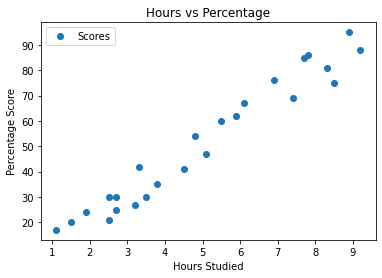

In [4]:
student_data.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

Preparing the data into attributes (inputs) & labels (outputs)

In [5]:
X = student_data.iloc[:, :-1].values
Y = student_data.iloc[:, 1].values

In [6]:
print(X) #Scores

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [7]:
print(Y) #Scores

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Split this Data into training & test sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                    random_state = 0 ) 

Train our algorithm

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training completed")

Training completed


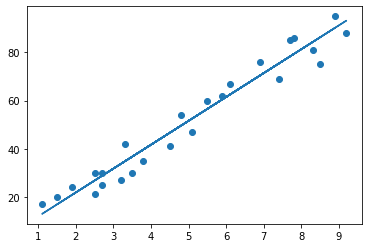

In [10]:
# plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# plotting for the test data 
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

In [11]:
print(X_test) # Testing the data- In Hours

Y_pred = regressor.predict(X_test) # predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted

df = pd.DataFrame( {'Actual': Y_test, 'Predicted': Y_pred })
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# Test student studies for 9.25 hrs/day

hr = [ [9.25] ]
own_pred = regressor.predict(hr)
print("Number of Hours =",hr[0][0])
print("Predicted Score =", own_pred[0])

Number of Hours = 9.25
Predicted Score = 93.69173248737538


In [14]:
print("Mean Absolute Error ",metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error  4.18385989900298
